In [8]:
from src.autoencoder import MNISTAutoEncoder
from src.pca import PCA

import torch

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np

In [9]:
dataset = datasets.MNIST(
    root='../../data', train=True, download=True,
    transform=transforms.ToTensor()
)

Loading pre-trained autoencoder model.

In [10]:
model = MNISTAutoEncoder(784, 2)
model.load_state_dict(
    torch.load('../../models/mnist_autoencoder_bce.pth', map_location=torch.device('cpu'), weights_only=True))
# Optimizer-Adam
# Criterion-CrossEntropyLoss
# Epochs-70

<All keys matched successfully>

In [11]:
model

MNISTAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=500, out_features=300, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=2, bias=True)
    (7): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=300, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=300, out_features=500, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=500, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [12]:
def plot_each_class(X: torch.Tensor, y: torch.Tensor, n: int = 10, title: str = '') -> None:
    fig, axes = plt.subplots(10, n, figsize=(n, 10))
    for class_i in range(10):
        digit_indices = (y == class_i).nonzero().flatten()
        for i in range(n):
            axes[class_i, i].imshow(X[digit_indices[i]].reshape(28, 28), cmap='gray')
            axes[class_i, i].axis('off')
    fig.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(hspace=5e-2, wspace=5e-2)

In [13]:
X, y = dataset.data.float(), dataset.targets

In [14]:
plot_each_class(X, y, title='Original digits')
plt.savefig('../../resources/ae/mnist_original_digits.png', transparent=True)

Evaluate AE on dataset

In [15]:
model.eval()
with torch.no_grad():
    X_encoded = model.encoder(X.view(-1, 784))
    X_decoded = model.decoder(X_encoded)

In [16]:
plot_each_class(X_decoded, y, title='Decoded digits')
plt.savefig('../../resources/ae/mnist_decoded_digits.png', transparent=True)

Results are clearly greater than PCA for 2 components.

Lets analyze the latent spaces fot AE and PCA.

In [11]:
X_encoded = X_encoded.numpy()

In [12]:
plt.figure(figsize=(10, 10))
for digit in range(10):
    digit_indices = (y == digit).nonzero().flatten()
    plt.scatter(X_encoded[digit_indices, 0], X_encoded[digit_indices, 1], label=digit, alpha=0.5)
plt.legend()
plt.title('Latent space')

Text(0.5, 1.0, 'Latent space')

There are clear clusters in the latent space of the AE model.

In [13]:
pca = PCA(2)
pca.fit(X.view(-1, 784).numpy())

PCA(n_components=2)

In [14]:
X_pca = pca.transform(X.view(-1, 784).numpy())

Text(0.5, 1.0, 'PCA')

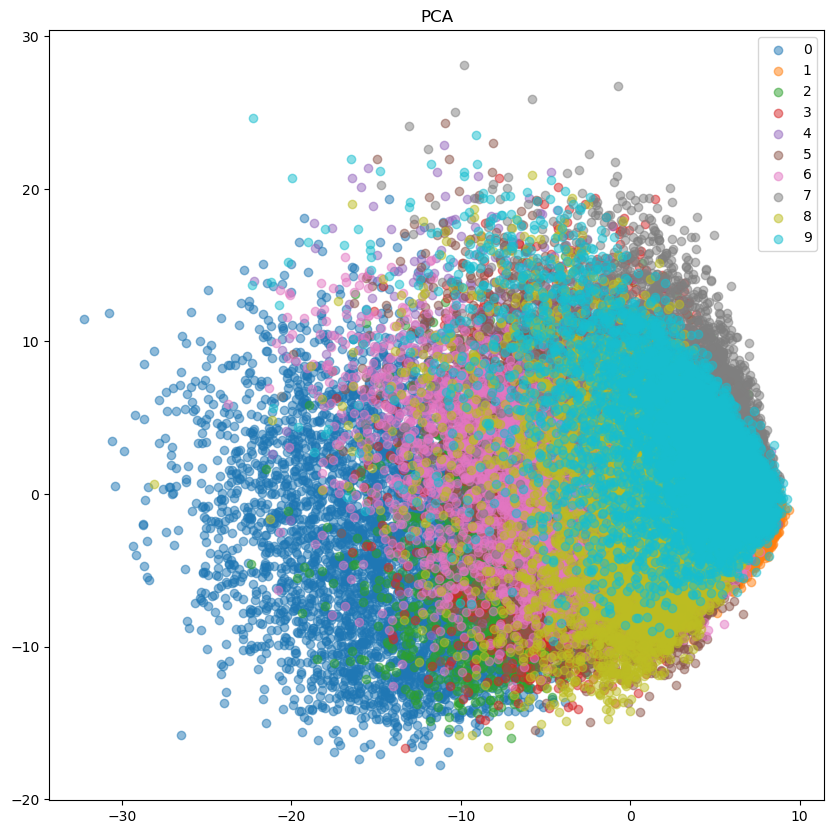

In [15]:
plt.figure(figsize=(10, 10))
for digit in range(10):
    digit_indices = (y == digit).nonzero().flatten()
    plt.scatter(X_pca[digit_indices, 0], X_pca[digit_indices, 1], label=digit, alpha=0.5)
plt.legend()
plt.title('PCA')

PCA latent space is far from being clustered.

In [37]:
fig, (ae_ax, pca_ax) = plt.subplots(1, 2, figsize=(20, 10))

for digit in range(10):
    digit_indices = (y == digit).nonzero().flatten()
    ae_ax.scatter(X_encoded[digit_indices, 0], X_encoded[digit_indices, 1], label=digit, alpha=0.5)
    pca_ax.scatter(X_pca[digit_indices, 0], X_pca[digit_indices, 1], label=digit, alpha=0.5)
    
ae_ax.set_title('AE Latent space')
pca_ax.set_title('PCA Latent space')

ae_ax.set_xticks([])
ae_ax.set_yticks([])

pca_ax.set_xticks([])
pca_ax.set_yticks([])

plt.figlegend(labels=[str(i) for i in range(10)], 
              loc='upper center', ncols=10)
plt.tight_layout()
plt.savefig('../../resources/ae/mnist_latent_spaces.png', transparent=True)